In [57]:
%pip install plotly
%pip install pandas
%pip install nbformat --upgrade
%pip install --upgrade matplotlib
%pip install seaborn

'''pip install numpy
pip install lifetimes
pip install --upgrade matplotlib
pip install seaborn
pip install scikit-learn'''

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


'pip install numpy\npip install lifetimes\npip install --upgrade matplotlib\npip install seaborn\npip install scikit-learn'

In [2]:

import pandas as pd
from datetime import datetime as dt
from datetime import timedelta
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors


# Data Wrangling

In [3]:
data = pd.read_csv('C:\\Users\\Admin\\OneDrive\\Desktop\\Jupyter\\Online Retail\\online_retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
data.dropna(subset = ['CustomerID'], inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   TotalAmount  406829 non-null  Float64       
dtypes: Float64(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 31.4+ MB


In [10]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['TotalAmount'] = (data['Quantity'] * data['UnitPrice']).astype('float64').round(2)
data['CustomerID'] = data['CustomerID'].astype(str)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   TotalAmount  406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
reference_date = pd.Timestamp(dt.now().date())
#reference_date

In [14]:
reference_date = data['InvoiceDate'].max() + timedelta(days = 1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   TotalAmount  406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


In [16]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64

In [17]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,TotalAmount
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,20.401854
min,-80995.000000,2010-12-01 08:26:00,0.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,4.200000
50%,5.000000,2011-07-31 11:48:00,1.950000,11.100000
75%,12.000000,2011-10-20 13:06:00,3.750000,19.500000
max,80995.000000,2011-12-09 12:50:00,38970.000000,168469.600000
std,248.693370,NaN,69.315162,427.591718


In [18]:
data.shape

(406829, 9)

In [19]:
#number of unique products 
print(data['Description'].nunique())

3896


In [20]:
#number of each products 
data['Description'].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
Name: count, dtype: int64

In [21]:
#The most ordered product
data.groupby("Description").agg({"Quantity" : "sum"}).head()


,Quantity
Description,
4 PURPLE FLOCK DINNER CANDLES,140
50'S CHRISTMAS GIFT BAG LARGE,1883
DOLLY GIRL BEAKER,2391
I LOVE LONDON MINI BACKPACK,360
I LOVE LONDON MINI RUCKSACK,1


In [22]:
#Number of invoices were issued in total
data['InvoiceNo'].nunique()

22190

In [23]:
data.groupby('InvoiceNo').agg({"TotalAmount" : "sum"}).head()

,TotalAmount
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85


In [24]:
#The most expensive products
data.groupby('Description').agg({"UnitPrice" : "max"}).sort_values("UnitPrice", ascending = False).head()

,UnitPrice
Description,
Manual,38970.00
POSTAGE,8142.75
Discount,1867.86
DOTCOM POSTAGE,1599.26
CRUK Commission,1100.44


In [25]:
# Number of orders from which country
data['Country'].value_counts().head()

Country
United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: count, dtype: int64

In [28]:
#The most returned product
returned = data[data['InvoiceNo'].str.contains("C", na = False)]
returned.sort_values("Quantity", ascending = True).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,-280.8
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,-6539.4
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,-3700.0


Missing Value Analysis

In [30]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64

In [32]:
data.dropna(inplace = True)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64

Outlier Value Analysis

In [37]:
for features in ["Quantity","UnitPrice","TotalAmount"]:
    
    Q1 = data[features].quantile(0.01)
    Q3 = data[features].quantile(0.99)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if data[[features]].select_dtypes(exclude=['datetime64']).apply(lambda x: 
        (x > upper) | (x < lower)).any(axis=None):
        print(features,"yes")
        print(data[(data[features] > upper) | (data[features] < lower)].shape[0])
    else:
        print(features, "no")

Quantity yes
948
UnitPrice yes
846
TotalAmount yes
1030


# RFM Model 
'''
Recency : ลูกค้าที่สั่งซื้อสินค้าล่าสุดวันนี้ จะได้ R Score > ลูกค้าที่สั่งซื้อสินค้าล่าสุดเมื่อ 3 ปีที่แล้ว
Frequency : ลูกค้าที่สั่งซื้อสินค้าบ่อยที่สุดในร้าน จะได้ F Score > ลูกค้าmujสั่งซื้อสินค้าน้อยครั้งที่สุดในร้าน
Monetary : ลูกค้าที่ช้จ่ายเยอะที่สุดในร้าน จะได้ M Score > ลูกค้าที่ใช้จ่ายน้อยที่สุดในร้าน
'''

In [38]:
#ทำRFM Analysis โดย group by Customer ID
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (reference_date - x.max()).days,
    'InvoiceNo' : 'count',
    'TotalAmount' : 'sum'
})

In [39]:
#ทำตารางRFM
rfm.rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo' : 'Frequency', 
                      'TotalAmount' : 'Monetary'}, inplace = True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [43]:
#ระบุ Quantiles
quantiles = rfm.quantile(q = [0.20, 0.40, 0.60, 0.8])

#จัดคะแนนตามRFM
# x คือ ค่าที่จะกลายเป็นscore ในRFM
# p คือ column name ในRFM
# d คือ data frame ที่เก็บquantiles
def RScore(x, p, d):
    #Recency
    if (p == 'Recency'):
        if (x <= d[p][0.20]):
            return 5
        elif (x <= d[p][0.40]):
            return 4
        elif (x <= d[p][0.60]):
            return 3
        elif (x <= d[p][0.80]):
            return 2
        else:
            return 1
    # Frequency, Monetery
    else:
        if (x <= d[p][0.20]):
            return 1
        elif (x <= d[p][0.40]):
            return 2
        elif (x <= d[p][0.60]):
            return 3
        elif (x <= d[p][0.80]):
            return 4
        else:
            return 5
        
        
rfm['R'] = rfm['Recency'].apply(RScore, args = ('Recency', quantiles, ))
rfm['F'] = rfm['Frequency'].apply(RScore, args = ('Frequency', quantiles, ))
rfm['M'] = rfm['Monetary'].apply(RScore, args = ('Monetary', quantiles, ))

In [44]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,19,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2


In [45]:
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)

In [46]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3
12347.0,2,182,4310.00,5,5,5,555,15
12348.0,75,31,1797.24,2,3,4,234,9
12349.0,19,73,1757.55,4,4,4,444,12
12350.0,310,17,334.40,1,2,2,122,5


In [47]:
#ระบุSegment

segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']

def assign_segment(score):
    if (score < 5):
        return 'Low-Value'
    elif (score < 9):
        return 'Mid-Value'
    else:
        return 'High-Value'
        
        
rfm['RFM_Segment_Labels'] = rfm['RFM_Score'].apply(assign_segment)

In [48]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Segment_Labels
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3,Low-Value
12347.0,2,182,4310.00,5,5,5,555,15,High-Value
12348.0,75,31,1797.24,2,3,4,234,9,High-Value
12349.0,19,73,1757.55,4,4,4,444,12,High-Value
12350.0,310,17,334.40,1,2,2,122,5,Mid-Value


In [49]:
segment_counts = rfm['RFM_Segment_Labels'].value_counts().reset_index()
segment_counts.columns = ['RFM_Segment', 'Count']
segment_counts = segment_counts.sort_values('RFM_Segment')

In [50]:
#Create Bar chart using plotly

fig = px.bar(segment_counts,
             x = 'RFM_Segment', 
             y = 'Count', 
             title = "Customer Distribution by RFM Segment",
             labels = {'RFM_Segment' : 'RFM_Segment', 'Count' : 'Number of Customers'},
             color = 'RFM_Segment', 
             color_discrete_sequence = px.colors.qualitative.Pastel)


fig.show()

RFM Analysis

- Champion: The customer with the highest purchase frequency and value. is the most important customer group in the business.
- Loyal: Customers with high purchasing frequency and value. This is often a large part of the income.
- Promising: New customers with high purchase frequency and value. which has the opportunity to become a Loyal customer in the future
- New Customers: New customers who are just starting to purchase products.
- Warm Leads: Customers with high but not frequent purchase values.
- Cold Leads: Customers who purchase infrequently and with low purchase values.
- Need Attention: Customers who make infrequent purchases and have low purchase values. Should pay additional attention.
- Shouldn’t Lose: Customers with high but infrequent purchase values. You should maintain and build relationships.
- Sleepers: Customers with low purchase and purchase value. This may require further improvements.
- Lost: Customers who have not purchased a product in a long time. You may need to consider giving additional attention or shifting your focus to another customer group.

In [51]:
#Create RFM chart
rfm['RFM_Customer_Segments'] = ''


rfm.loc[(rfm['Recency'] <= 2) & (rfm['Frequency'] > 4), 'RFM_Customer_Segments'] = "Champions"
rfm.loc[(rfm['Recency'] <= 4) & (rfm['Frequency'] > 3), 'RFM_Customer_Segments'] = "Loyal Customers"
rfm.loc[(rfm['Recency'] <= 5) & (rfm['Frequency'] > 2), 'RFM_Customer_Segments'] = "Potential Loyalist"
rfm.loc[(rfm['Recency'] <= 6) & (rfm['Frequency'] > 1), 'RFM_Customer_Segments'] = "New Customers"
rfm.loc[(rfm['Recency'] > 6) & (rfm['Frequency'] > 1), 'RFM_Customer_Segments'] = "Promising"
rfm.loc[(rfm['Recency'] > 7) & (rfm['Frequency'] > 1), 'RFM_Customer_Segments'] = "About to Sleep"
rfm.loc[(rfm['Recency'] > 8) & (rfm['Frequency'] > 1), 'RFM_Customer_Segments'] = "Need Attention"
rfm.loc[(rfm['Recency'] > 8) & (rfm['Frequency'] <= 1), 'RFM_Customer_Segments'] = "Can't Lose Them"
rfm.loc[(rfm['Recency'] > 10) & (rfm['Frequency'] <= 1), 'RFM_Customer_Segments'] = "At Risk"
rfm.loc[(rfm['Recency'] > 12) & (rfm['Frequency'] <= 1), 'RFM_Customer_Segments'] = "Hibernating"
rfm.loc[(rfm['Recency'] > 14) & (rfm['Frequency'] == 0), 'RFM_Customer_Segments'] = "Lost"


segment_counts = rfm['RFM_Customer_Segments'].value_counts().sort_index()

- Champions → Recent, frequent, and high-spending customers.
- Loyal Customers → Regular buyers, but not as frequent as champions.
- Potential Loyalist → Customers who show interest and could become loyal.
- New Customers → Recently started purchasing, but need retention efforts.
- Promising → Bought something but not consistent yet.
- About to Sleep → Engaged before but slowing down.
- Need Attention → Customers with declining engagement.
- Can't Lose Them → Previously engaged, now inactive, need win-back strategy.
- At Risk → Not buying for a long time, may leave completely.
- Hibernating → Rarely active, very infrequent purchases.
- Lost → Customers who haven't purchased for a long time.

In [77]:
segment_product_counts = rfm.groupby(['RFM_Segment_Labels', 
                                      'RFM_Customer_Segments']).size().reset_index(name = 'Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending = False)

In [78]:
#Create Treemap

fig_treemap_segment_product = px.treemap(segment_product_counts, 
                                         path = ['RFM_Segment_Labels', 'RFM_Customer_Segments'], 
                                         values= 'Count', color = 'RFM_Segment_Labels',
                                         color_discrete_sequence = px.colors.qualitative.Pastel,
                                         title = "RFM Customer Segment by Monetary")

#Show Treemap
fig_treemap_segment_product.show()

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

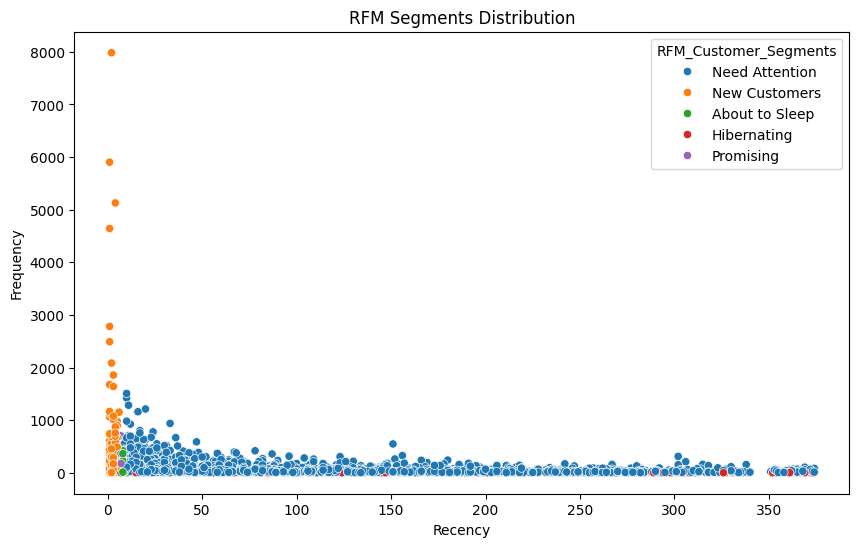

In [80]:

plt.figure(figsize = (10, 6))
sns.scatterplot(data = rfm, x = "Recency", y = "Frequency", hue = "RFM_Customer_Segments", palette = "tab10")
plt.title("RFM Segments Distribution")
plt.show()

In [83]:
# Pivot table
rfm_pivot = rfm.pivot_table(index = "RFM_Customer_Segments", 
                            values = ["Recency", "Frequency", "Monetary"], aggfunc = "mean")

# Plot heatmap
fig = px.imshow(rfm_pivot, 
                labels = dict(x = "RFM Metrics", y = "Customer Segments", color = "Value"),
                x = rfm_pivot.columns,
                y = rfm_pivot.index,
                color_continuous_scale = "RdBu_r")

fig.update_layout(title = "Interactive RFM Score Heatmap")
fig.show()


Insight:

- ลูกค้าส่วนใหญ่ใช้จ่ายมากหรือน้อย?
- มีลูกค้าที่ซื้อน้อยมากแต่ใช้จ่ายสูงไหม?
- Recency บอกว่ามีลูกค้าเก่าที่ไม่ได้กลับมาซื้อเยอะหรือไม่?

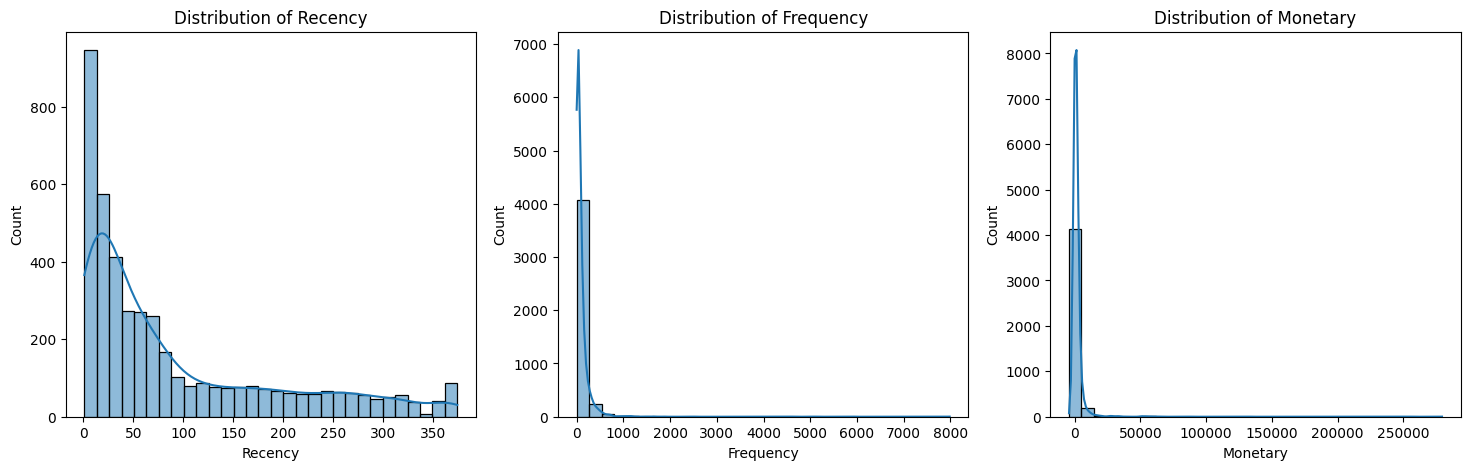

In [84]:
#ดูการกระจายของค่า Recency, Frequency, Monetary เพื่อตรวจสอบว่ามีค่า outlier
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm["Recency"], bins = 30, kde = True, ax = axes[0])
axes[0].set_title("Distribution of Recency")

sns.histplot(rfm["Frequency"], bins = 30, kde = True, ax = axes[1])
axes[1].set_title("Distribution of Frequency")

sns.histplot(rfm["Monetary"], bins = 30, kde = True, ax = axes[2])
axes[2].set_title("Distribution of Monetary")

plt.show()


Insight:

- กลุ่มไหนมี Frequency สูงสุด?
- กลุ่มไหนใช้เงินมากที่สุด?
- ลูกค้ากลุ่ม "At Risk" หรือ "Lost" มีค่า Recency สูงมากไหม

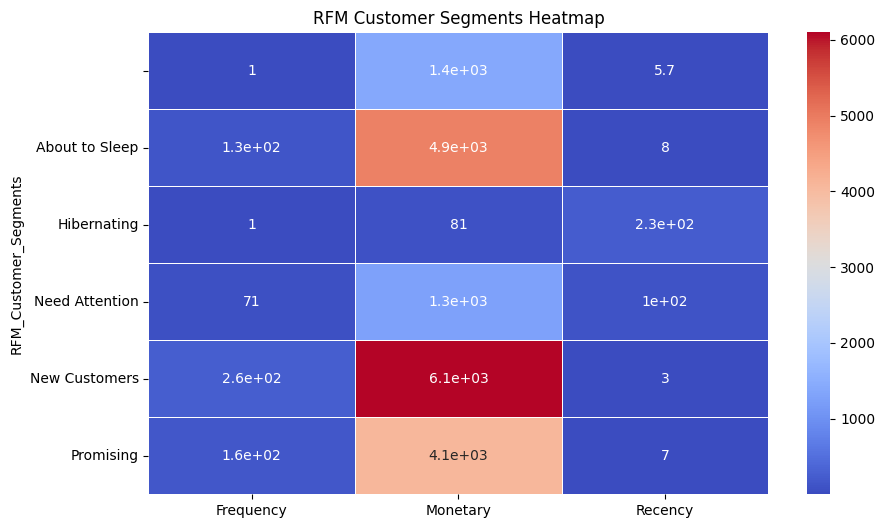

In [85]:
#ดูว่ากลุ่มลูกค้าแต่ละประเภทแตกต่างกันอย่างไร

rfm_pivot = rfm.pivot_table(index = "RFM_Customer_Segments", values = [
    "Recency", "Frequency", "Monetary"], aggfunc = "mean")

plt.figure(figsize = (10, 6))
sns.heatmap(rfm_pivot, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("RFM Customer Segments Heatmap")
plt.show()


Insight:

- กลุ่มไหนมีลูกค้าเยอะสุด?
- ถ้ากลุ่ม "Lost" มีเยอะ → ควรออกแคมเปญดึงลูกค้ากลับมา

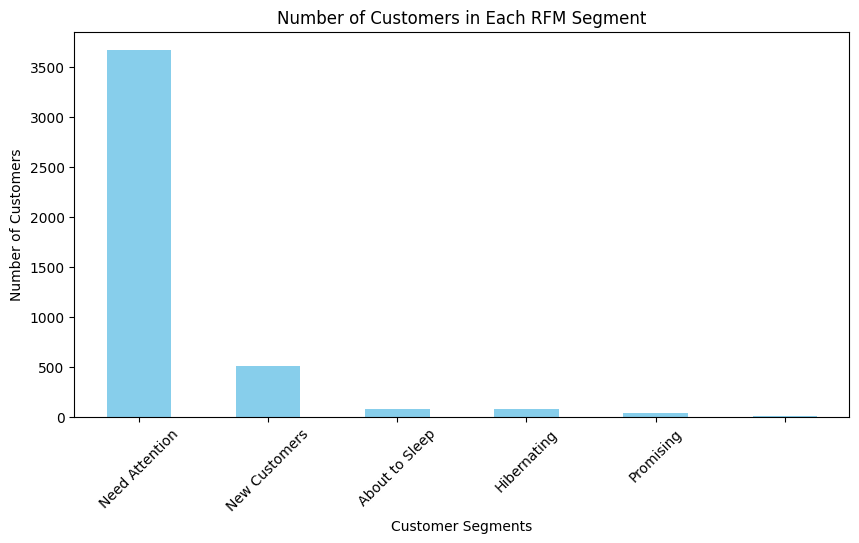

In [86]:
#ดูว่ามีลูกค้าอยู่ในแต่ละ Segment กี่คน
rfm["RFM_Customer_Segments"].value_counts().plot(kind="bar", figsize=(10, 5), color="skyblue")
plt.title("Number of Customers in Each RFM Segment")
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

Insight:

- ลูกค้าบางคนซื้อน้อยแต่จ่ายเงินเยอะมากไหม? (High Monetary, Low Frequency)
- ลูกค้าที่ซื้อบ่อยๆ แต่ใช้จ่ายน้อย ควร Upsell อะไรได้บ้าง

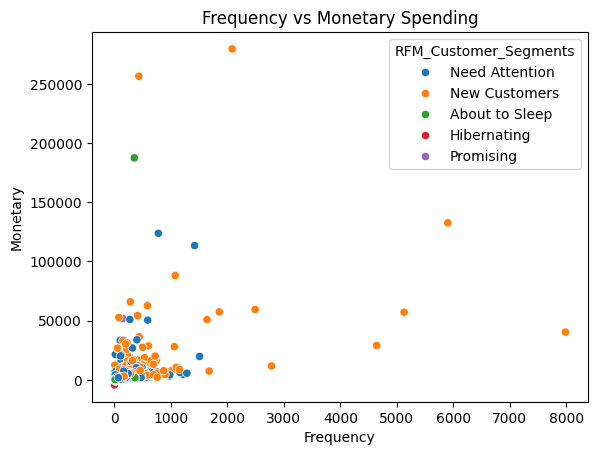

In [88]:
#ดูความสัมพันธ์ระหว่างจำนวนครั้งที่ซื้อและจำนวนเงินที่ใช้
sns.scatterplot(data = rfm, x = "Frequency", y = "Monetary", hue = "RFM_Customer_Segments", palette = "tab10")
plt.title("Frequency vs Monetary Spending")
plt.show()

หา Insights จากข้อมูล RFM Analysis
เมื่อได้ข้อมูลและ Visualization แล้ว ควรวิเคราะห์หา Insights ต่อ

- กลุ่มลูกค้าไหนสำคัญที่สุด: 
Champions และ Loyal Customers ควรมีโปรแกรม Loyalty เช่น ส่วนลดพิเศษ
Potential Loyalist ควรมีโปรโมชันดึงให้เป็นลูกค้าประจำ
At Risk และ Lost ต้องใช้กลยุทธ์ดึงลูกค้ากลับมา เช่น ส่งอีเมลโปรโมชั่น

- ลูกค้ากลุ่มไหนมีโอกาสเติบโต: 
Promising และ New Customers ควรมี Onboarding Campaign ทำให้เขากลายเป็น "Loyal Customers"

- ควรออกโปรโมชันแบบไหน: 
ถ้ากลุ่ม Lost เยอะ → ทำ Win-back Campaign
ถ้ากลุ่ม Can't Lose Them มีสูง → ต้องรักษา Loyalty ด้วยของรางวัล

In [68]:
vip_segment = rfm[rfm['RFM_Customer_Segments'] == "Loyal Customers"]

In [69]:
fig = go.Figure()
fig.add_trace(go.Box(y = vip_segment['Recency'], name = "Recency"))
fig.add_trace(go.Box(y = vip_segment['Frequency'], name = "Frequency"))
fig.add_trace(go.Box(y = vip_segment['Monetary'], name = "Monetary")) 


In [72]:
correlation_matrix = vip_segment[['R', 'F', 'M']].corr()

In [73]:
#Create Heatmap

fig_heatmap = go.Figure(data = go.Heatmap(
                    z = correlation_matrix.values, 
                    x = correlation_matrix.columns, 
                    y = correlation_matrix.columns,
                    colorscale = 'RdBu',
                    colorbar = dict(title = 'Correlation')))

fig_heatmap.update_layout(title = "Correlation Matrix of RFM Monetary within Champion Segment")


#Show Heatmap

fig_heatmap.show()

In [74]:
# ดูall of rank
pastel_colors = plotly.colors.qualitative.Pastel

fig = go.Figure(data = [go.Bar(x = segment_counts.index, y = segment_counts.values,
                               marker = dict(color = pastel_colors))])


vip_color = 'rgb(158, 202, 225)'

fig.update_traces(marker_color=[vip_color if segment == "Champions" else pastel_colors[i]
                                for i, segment in enumerate(segment_counts.index)],
                  marker_line_color = 'rgb(8, 48, 107)',
                  marker_line_width = 1.5, opacity = 0.6)


# update the layout
fig.update_layout(title = "Comparison of RFM Segments",
                  xaxis_title = "RFM Segments",
                  yaxis_title = "Number of Customers",
                  showlegend = False)

# Display the figure

fig.show()

In [75]:
segment_scores = rfm.groupby('RFM_Customer_Segments')[['R', 'F', 'M']].mean().reset_index()
fig = go.Figure()


#Add bar for Recency Score
fig.add_trace(go.Bar(
    x = segment_scores['RFM_Customer_Segments'],
    y = segment_scores['R'],
    name = 'Recency Score',
    marker_color = 'rgb(158, 202, 225)'
))

#Add bar for Frequency Score
fig.add_trace(go.Bar(
    x = segment_scores['RFM_Customer_Segments'],
    y = segment_scores['F'],
    name = 'Frequency Score',
    marker_color = 'rgb(94, 158, 217)'
))

#Add bar for Monetary Score
fig.add_trace(go.Bar(
    x = segment_scores['RFM_Customer_Segments'],
    y = segment_scores['M'],
    name = 'Monetary Score',
    marker_color = 'rgb(32, 102, 148)'
))


# update the layout
fig.update_layout(title = "Comparison of RFM Segments based on Recency, Frequency, Monetery Scores",
                  xaxis_title = "RFM Segments",
                  yaxis_title = "Score",
                  barmode = "group",
                  showlegend = True)

# Display the figure

fig.show()

In [89]:
data.to_csv("Cleaned_Data.csv", index = False)